### Twitter Analysis
Common Attributes

In [1]:
import ast
import pandas as pd

# Load dataset
loc = r'data/clean/minyak_goreng.csv'
df = pd.read_csv(loc, index_col=0, engine='python')
print(df.shape)
df.columns

(651, 27)


Index(['id', 'conversation_id', 'date', 'timezone', 'place', 'tweet',
       'language', 'hashtags', 'user_id', 'username', 'name', 'day', 'hour',
       'link', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'search',
       'user_rt_id', 'user_rt', 'retweet_id', 'retweet_date', 'reply_to',
       'mentioned', 'tweet_clean', 'tweet_stem'],
      dtype='object')

In [2]:
df.describe()

,id,conversation_id,timezone,place,user_id,day,hour,nlikes,nreplies,nretweets,user_rt_id,user_rt,retweet_id,retweet_date
count,6.510000e+02,6.510000e+02,651.0,0.0,6.510000e+02,651.000000,651.000000,651.000000,651.000000,651.000000,0.0,0.0,0.0,0.0
mean,1.510802e+18,1.510801e+18,700.0,NaN,1.867140e+17,3.551459,14.526882,19.629800,8.669739,5.781874,NaN,NaN,NaN,NaN
std,1.682230e+15,1.682161e+15,0.0,NaN,3.273343e+17,1.829261,4.525531,144.005469,45.076004,43.897661,NaN,NaN,NaN,NaN
min,1.506525e+18,1.506525e+18,700.0,NaN,1.712898e+07,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,1.509644e+18,1.509644e+18,700.0,NaN,2.334396e+07,2.000000,11.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,1.511112e+18,1.511112e+18,700.0,NaN,6.918316e+07,4.000000,15.000000,2.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
75%,1.512039e+18,1.512039e+18,700.0,NaN,4.564266e+08,5.000000,18.000000,6.000000,2.000000,2.000000,NaN,NaN,NaN,NaN
max,1.513537e+18,1.513537e+18,700.0,NaN,7.596928e+17,7.000000,23.000000,2899.000000,655.000000,856.000000,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'Tweets by Date'}>

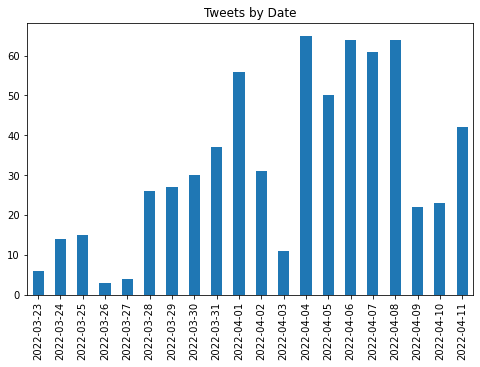

In [3]:
# Tweet by Data
df['date'] = pd.to_datetime(df['date']).dt.date
df.date.value_counts().sort_index().plot(kind='bar', title='Tweets by Date', figsize=(8,5))

<AxesSubplot:title={'center':'Tweets by Username'}>

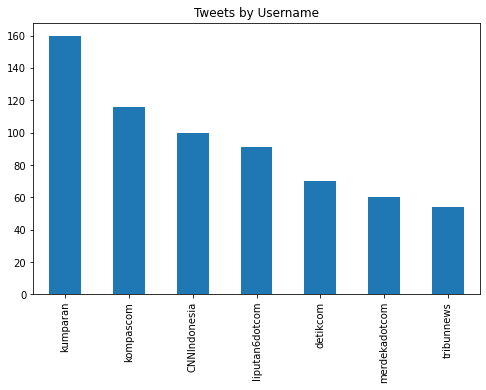

In [4]:
# Tweet by user
df.username.value_counts()[:10].sort_values(ascending=False).plot(kind='bar', title='Tweets by Username', figsize=(8,5))

<AxesSubplot:title={'center':'Tweets by Day'}>

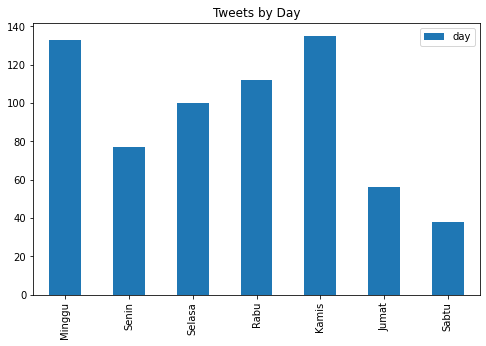

In [5]:
# Tweet by day
day = {1:'Minggu',2:'Senin',3:'Selasa',4:'Rabu',5:'Kamis',6:'Jumat',7:'Sabtu'}
day_name = df.day.apply(lambda r: day[r])
day_name = day_name.value_counts().to_frame()
day_name.reindex(list(day.values())).plot(kind='bar', title='Tweets by Day', figsize=(8,5))

<AxesSubplot:title={'center':'Tweets by Hour'}>

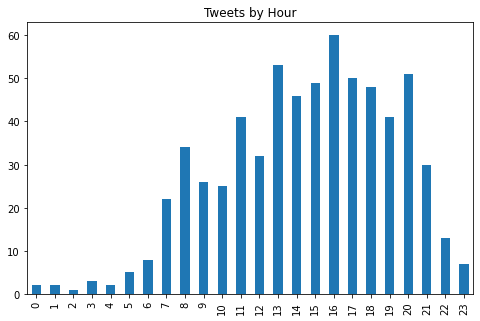

In [6]:
# Tweet by Hour
df.hour.value_counts().sort_index().plot(kind='bar', title='Tweets by Hour', figsize=(8,5))

<AxesSubplot:title={'center':'Tweet by Language'}, ylabel='language'>

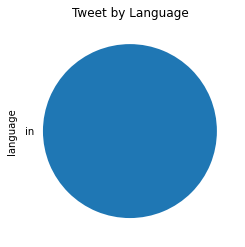

In [7]:
# Language used
df.language.value_counts().plot(kind='pie',title='Tweet by Language')

<AxesSubplot:title={'center':'Total Likes'}, ylabel='username'>

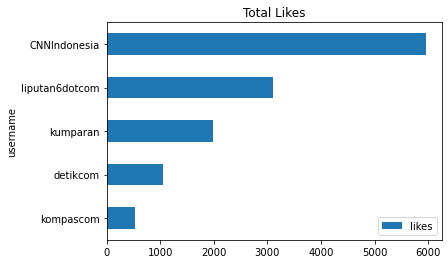

In [8]:
# Accounts by Number of Likes
like_most = df.groupby('username').nlikes.sum().reset_index(name ='likes').set_index('username').sort_values(by='likes',ascending=False)[:5]
like_most.sort_values(by='likes',ascending=True).plot(kind='barh', title='Total Likes')

In [9]:
# Most Liked Tweet by Account
for user in like_most.index[:3]:
    print('-',user)
    id = df.loc[df.username==user, 'nlikes'].idxmax()
    print(df.tweet.iloc[id], ':', df.nlikes.iloc[id])

- CNNIndonesia
Harga Minyak Goreng 2 Liter di Kawasan IKN Tembus Rp80 Ribu  https://t.co/PqZduR6eSp : 1472
- liputan6dotcom
BLT Minyak Goreng Habiskan Rp 6,9 Triliun, Kenapa Tak Bentuk BUMN CPO?  https://t.co/kflhzdsS6N : 2899
- kumparan
"Tidak ada statement, tidak ada komunikasi, harga minyak goreng sudah 4 bulan tidak ada penjelasan apa-apa. Kenapa ini terjadi?" Jokowi geram.  https://t.co/Du1CIxj6bp : 553


<AxesSubplot:title={'center':'Total Replies'}, ylabel='username'>

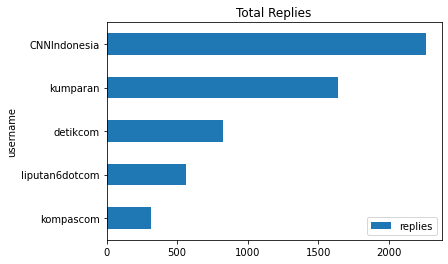

In [10]:
# Accounts by Number of Replies
replies_most = df.groupby('username').nreplies.sum().reset_index(name ='replies').set_index('username').sort_values(by='replies',ascending=False)[:5]
replies_most.sort_values(by='replies',ascending=True).plot(kind='barh', title='Total Replies')

In [11]:
# Most Liked Tweet by Account
for user in replies_most.index[:3]:
    print('-',user)
    id = df.loc[df.username==user, 'nreplies'].idxmax()
    print(df.tweet.iloc[id], ':', df.nreplies.iloc[id])

- CNNIndonesia
Megawati Buka Demo Masak Tanpa Minyak Goreng PDIP Besok  https://t.co/yfhCVzoLOB : 655
- kumparan
"Tidak ada statement, tidak ada komunikasi, harga minyak goreng sudah 4 bulan tidak ada penjelasan apa-apa. Kenapa ini terjadi?" Jokowi geram.  https://t.co/Du1CIxj6bp : 397
- detikcom
Presiden Jokowi menggelontorkan BLT minyak goreng. Besaran BLT yang diberikan 100 ribu per bulan selama 3 bulan terhitung April, Mei, Juni 2022.  https://t.co/F71OKT9nRp : 139


<AxesSubplot:title={'center':'Total Retweets'}, ylabel='username'>

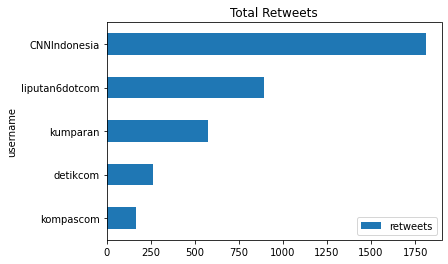

In [12]:
# Accounts by Number of Retweet
retweet_most = df.groupby('username').nretweets.sum().reset_index(name ='retweets').set_index('username').sort_values(by='retweets',ascending=False)[:5]
retweet_most.sort_values(by='retweets',ascending=True).plot(kind='barh', title='Total Retweets')

In [13]:
# Most Liked Tweet by Account
for user in retweet_most.index[:3]:
    print('-',user)
    id = df.loc[df.username==user, 'nretweets'].idxmax()
    print(df.tweet.iloc[id], ':', df.nretweets.iloc[id])

- CNNIndonesia
Harga Minyak Goreng 2 Liter di Kawasan IKN Tembus Rp80 Ribu  https://t.co/PqZduR6eSp : 451
- liputan6dotcom
BLT Minyak Goreng Habiskan Rp 6,9 Triliun, Kenapa Tak Bentuk BUMN CPO?  https://t.co/kflhzdsS6N : 856
- kumparan
"Tidak ada statement, tidak ada komunikasi, harga minyak goreng sudah 4 bulan tidak ada penjelasan apa-apa. Kenapa ini terjadi?" Jokowi geram.  https://t.co/Du1CIxj6bp : 168


<AxesSubplot:title={'center':'Most Accounts Mentioned'}>

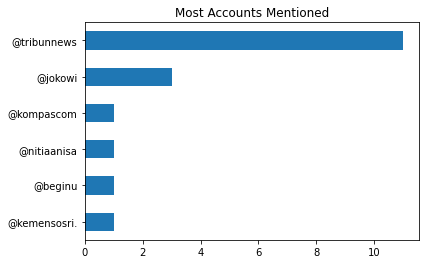

In [14]:
# Most Accounts Mentioned in Tweet
mentioned = list()
for user in df.mentioned:
    if not pd.isna(user):
        for i in ast.literal_eval(user):
            mentioned.append(i)
pd.DataFrame(mentioned, columns=['Accounts']).Accounts.value_counts().sort_values(ascending=True).plot(kind='barh', title="Most Accounts Mentioned")

Text Attributes

In [15]:
import ast
import pandas as pd
from utils.text import word_cloud

# Load dataset
loc = r'data/clean/tweet-minyak_goreng.csv'
df_text = pd.read_csv(loc, index_col=0, engine='python')
print(df_text.shape)
df_text.head(2)

(651, 6)


,id,date,username,tweet,tweet_clean,tweet_stem
0,1513509500489240582,2022-04-11 20:29:19,detikcom,KMHDI menyatakan sikapnya soal persoalan kelan...,kmhdi sikapnya kelangkaan minyak goreng wacana...,kmhdi sikap langka minyak goreng wacana jabat ...
1,1513453499098583041,2022-04-11 16:46:47,detikcom,Harga minyak goreng curah di Tasikmalaya masih...,harga minyak goreng curah tasikmalaya harga ec...,harga minyak goreng curah tasikmalaya harga ec...


Tweet Clean Wordcloud


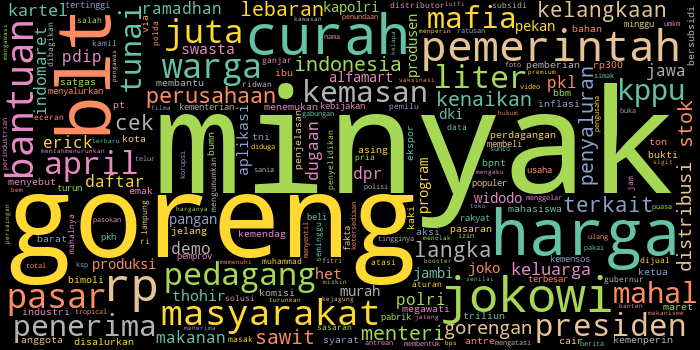

In [16]:
# Tweet Clean Wordcloud
print('Tweet Clean Wordcloud')
word_cloud(df_text.tweet_clean, background='black')

Tweet Clean Wordcloud (topic excluded)


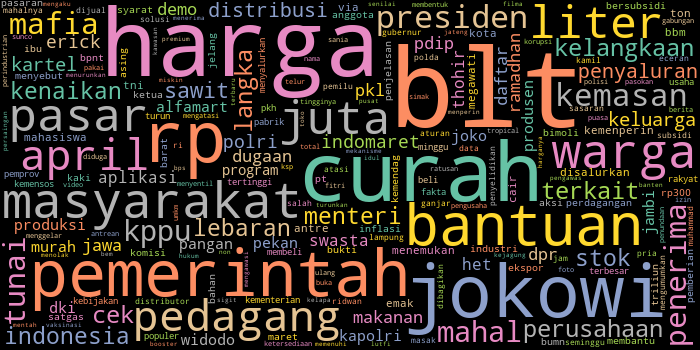

In [17]:
# Tweet Clean Wordcloud
print('Tweet Clean Wordcloud (topic excluded)')
word_cloud(df_text.tweet_clean, background='black', exclusion=['minyak','goreng'])

Tweet Stem Wordcloud


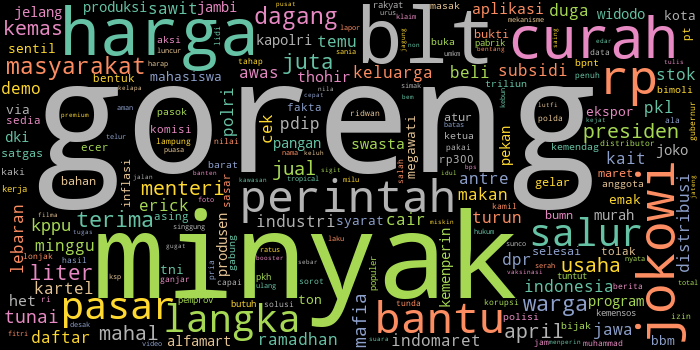

In [18]:
# Tweet Clean + Stemmed Wordcloud
print('Tweet Stem Wordcloud')
word_cloud(df_text.tweet_stem, background='black')

Tweet Stem Wordcloud (topic excluded)


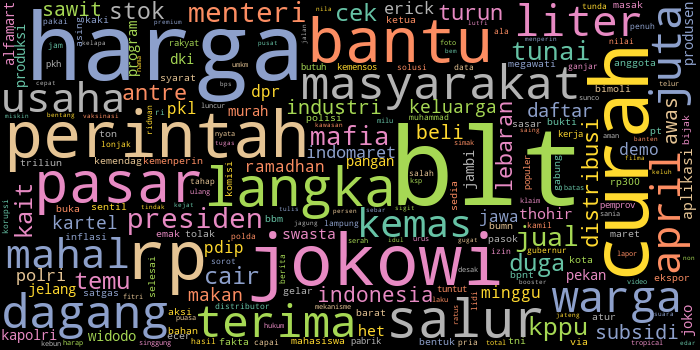

In [19]:
# Tweet Clean + Stemmed Wordcloud
print('Tweet Stem Wordcloud (topic excluded)')
word_cloud(df_text.tweet_stem, background='black', exclusion=['minyak','goreng'])

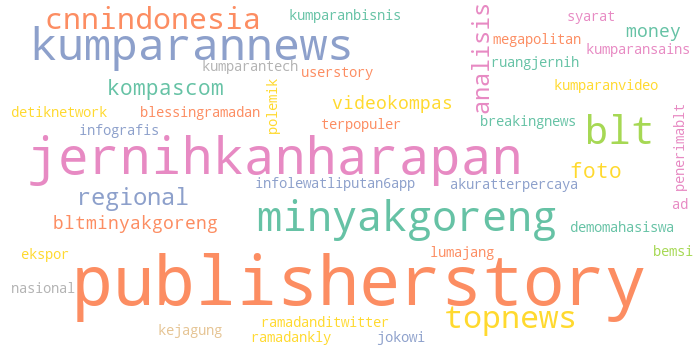

In [20]:
# Most Hastags Used
hastags = list()
for tags in df.hashtags:
    if not pd.isna(tags):
        for i in ast.literal_eval(tags):
            hastags.append(i)
word_cloud(hastags)